In [1]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import numpy as np
import pandas as pd
import scanpy as sc

import sys
sys.path.append("../../lib")
from deg_utils import DEGonAnnData

In [4]:
model = 'WM4007'

In [5]:
dataPath = '../../data/'

ids = sorted(np.loadtxt(dataPath + 'ids_%s_ST.txt' % model, dtype=str))
print(ids)

['WM4007_T0_S1_ST', 'WM4007_T0_S2_ST', 'WM4007_T1_S1_ST', 'WM4007_T1_S2_ST', 'WM4007_T2_S1_ST', 'WM4007_T2_S2_ST', 'WM4007_T3_S1_ST', 'WM4007_T3_S2_ST', 'WM4007_T4_S1_ST', 'WM4007_T4_S2_ST', 'WM4007_TC_S1_ST', 'WM4007_TC_S2_ST']


In [6]:
ad_all = sc.read(dataPath + 'ad_all_human_clustered_st_%s.h5ad' % model)
ad_all.shape

(11990, 17788)

# Untreated all vs all clusters

In [5]:
ad_sel = ad_all[ad_all.obs['T'].isin(['T0', 'TC']), :]
identity = 'cluster'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='U_all_vs_all', minPct=0.10, downsample=300, logfc_threshold=0.15)

0    1719
1    2571
2      27
4       9
5    1164
6     535
9     183
Name: cluster, dtype: int64
(1410, 10493) {'0': 300, '1': 300, '5': 300, '6': 300, '9': 183, '2': 27}
adata shape: (1410, 10493)
(2029, 6)
{'0': 5, '1': 108, '2': 212, '5': 100, '6': 135, '9': 62} 622


<div>
    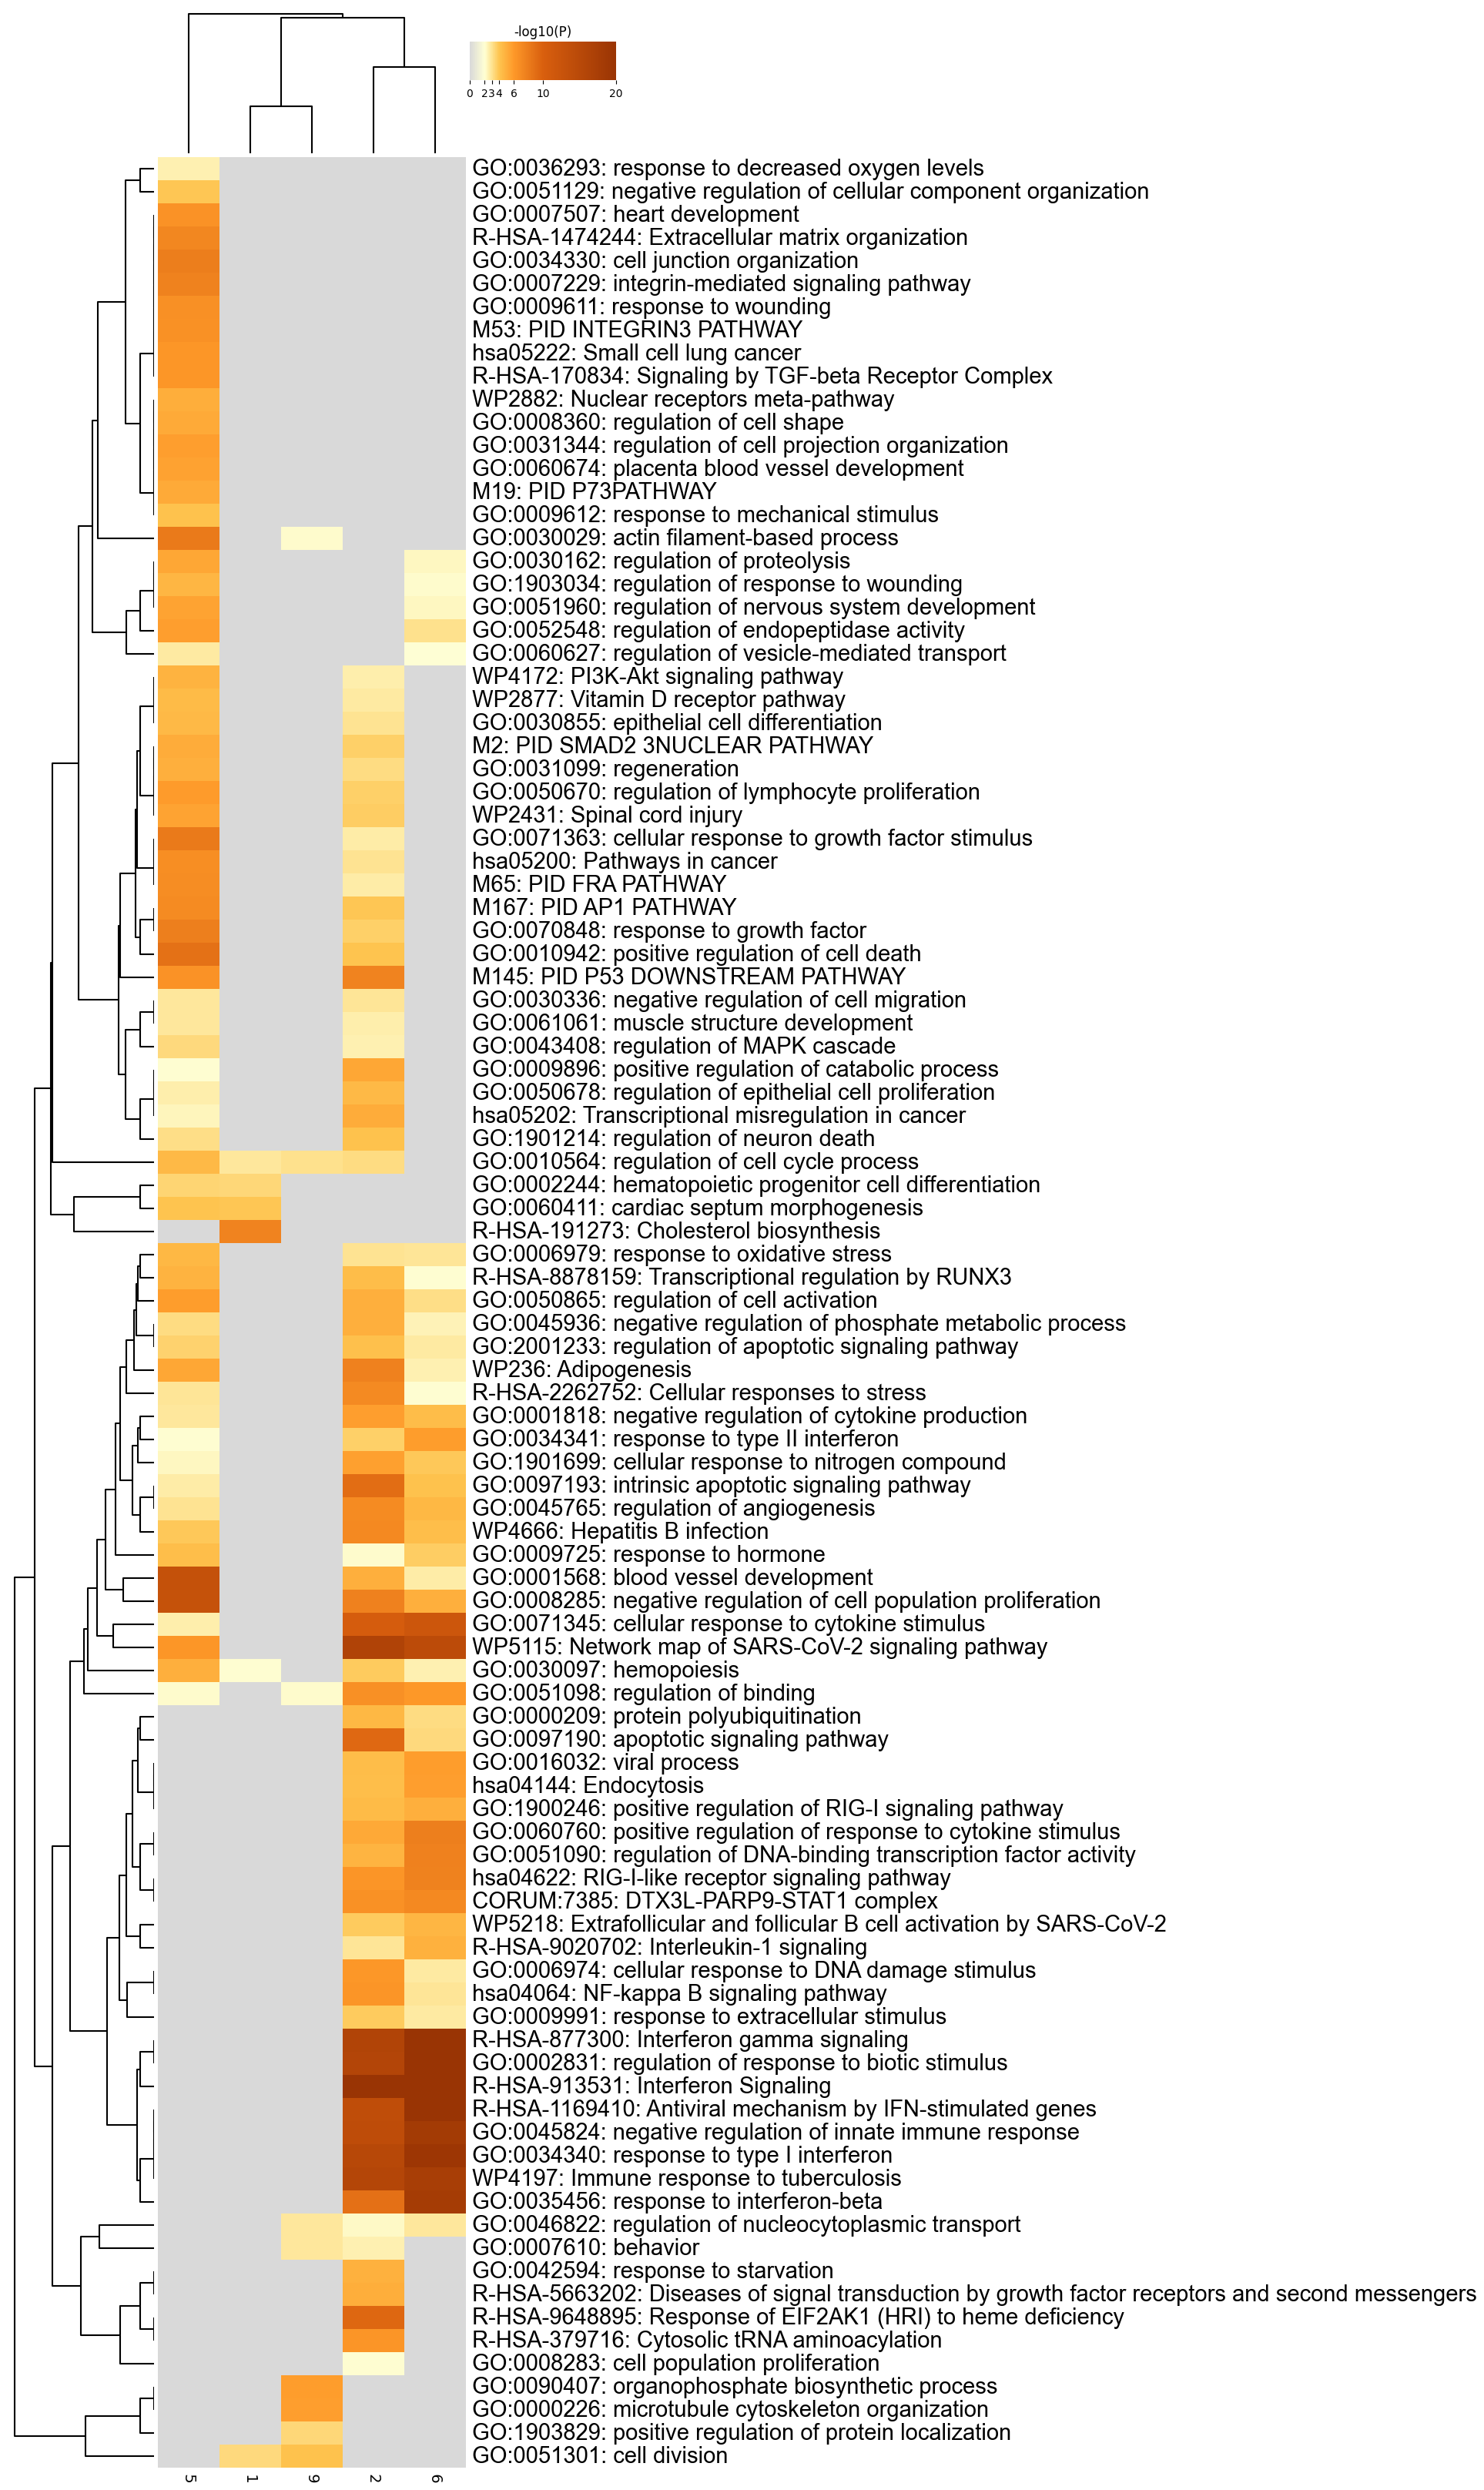
</div>

In [20]:
ad_sel = ad_all[(ad_all.obs['T'].isin(['T0'])) & (ad_all.obs['cluster'].isin(['0', '1', '5'])), :]
identity = 'cluster'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='Us_all_vs_all', minPct=0.10, downsample=300, logfc_threshold=0.15)

0     986
1    1164
5     510
Name: cluster, dtype: int64
(900, 10569) {'0': 300, '1': 300, '5': 300}
adata shape: (900, 10569)
(227, 6)
{'0': 8, '1': 146, '5': 72} 226


<div>
    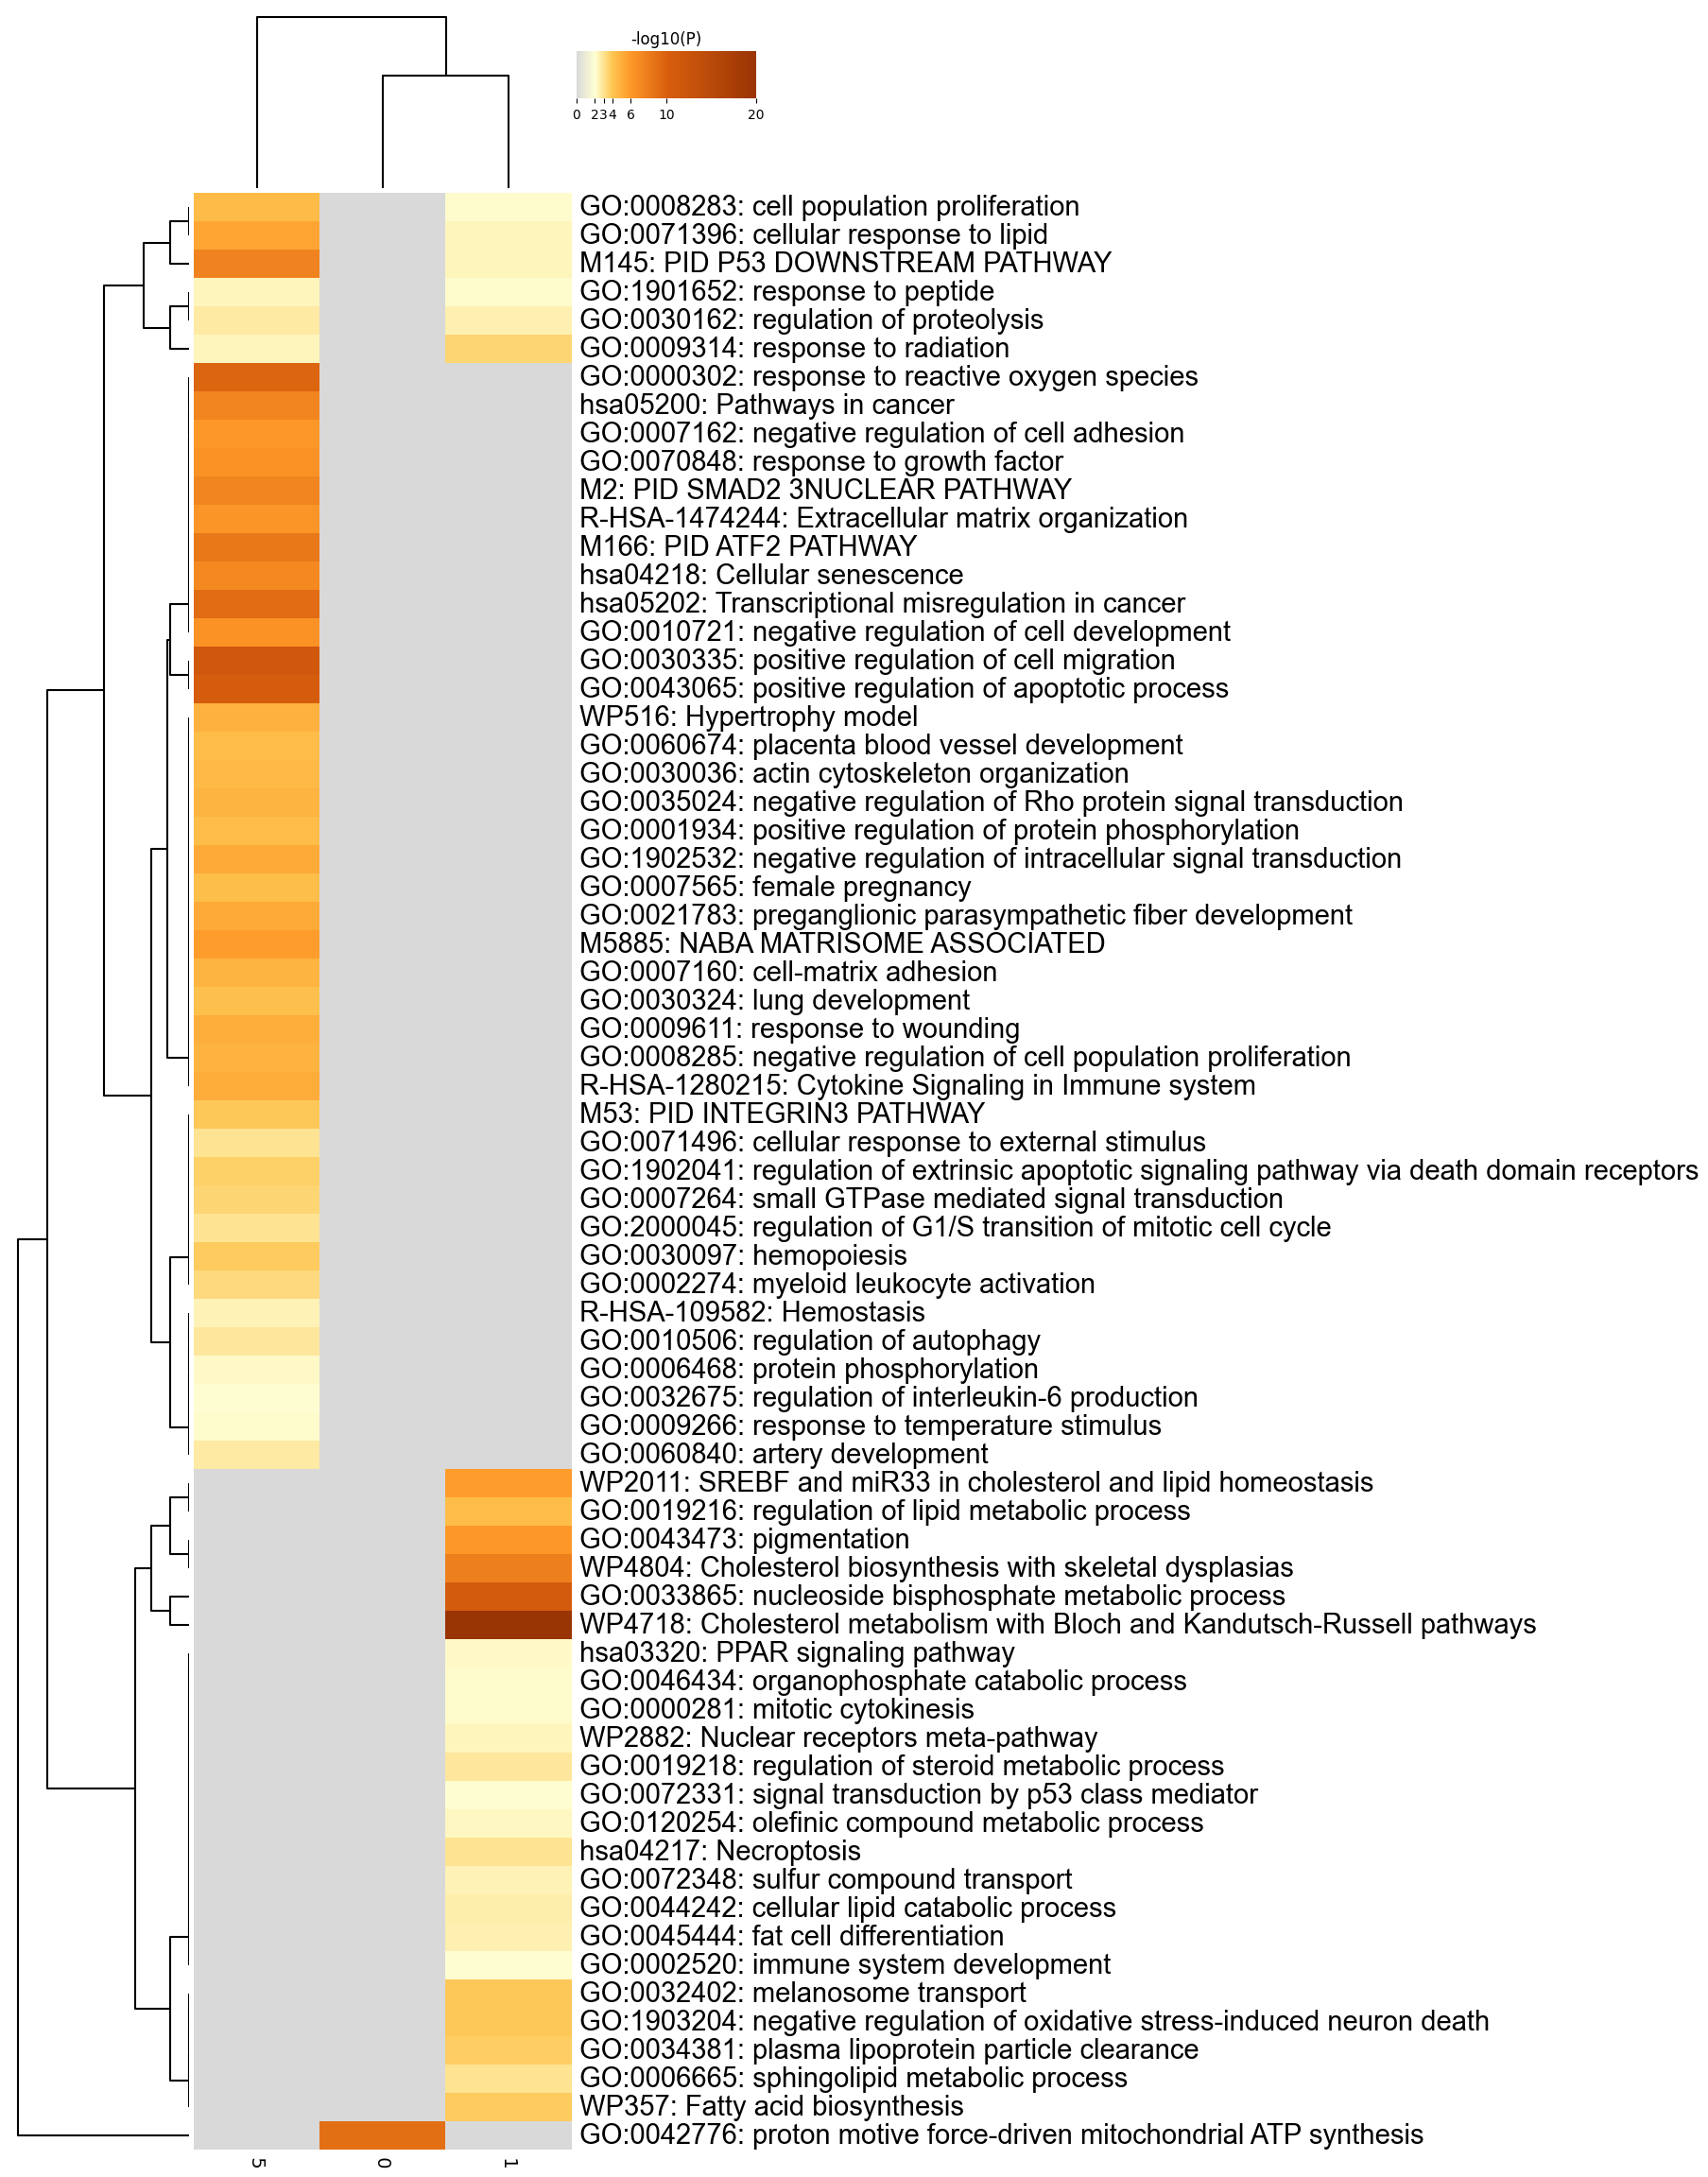
</div>

# Treated all vs all clusters

In [22]:
ad_sel = ad_all[ad_all.obs['T'].isin(['T1', 'T2', 'T3', 'T4']), :]
identity = 'cluster'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='T_all_vs_all', account_batch_var=True, batchvar='sample', minPct=0.10, downsample=300, logfc_threshold=0.35)

1       3
2    1672
3    1286
4    1246
6       2
7    1053
8     520
Name: cluster, dtype: int64
(1500, 10681) {'2': 300, '3': 300, '4': 300, '7': 300, '8': 300}
adata shape: (1500, 10681)
Correcting for batch variable: sample
(1308, 6)
{'2': 505, '3': 290, '7': 1, '8': 488} 1284


<div>
    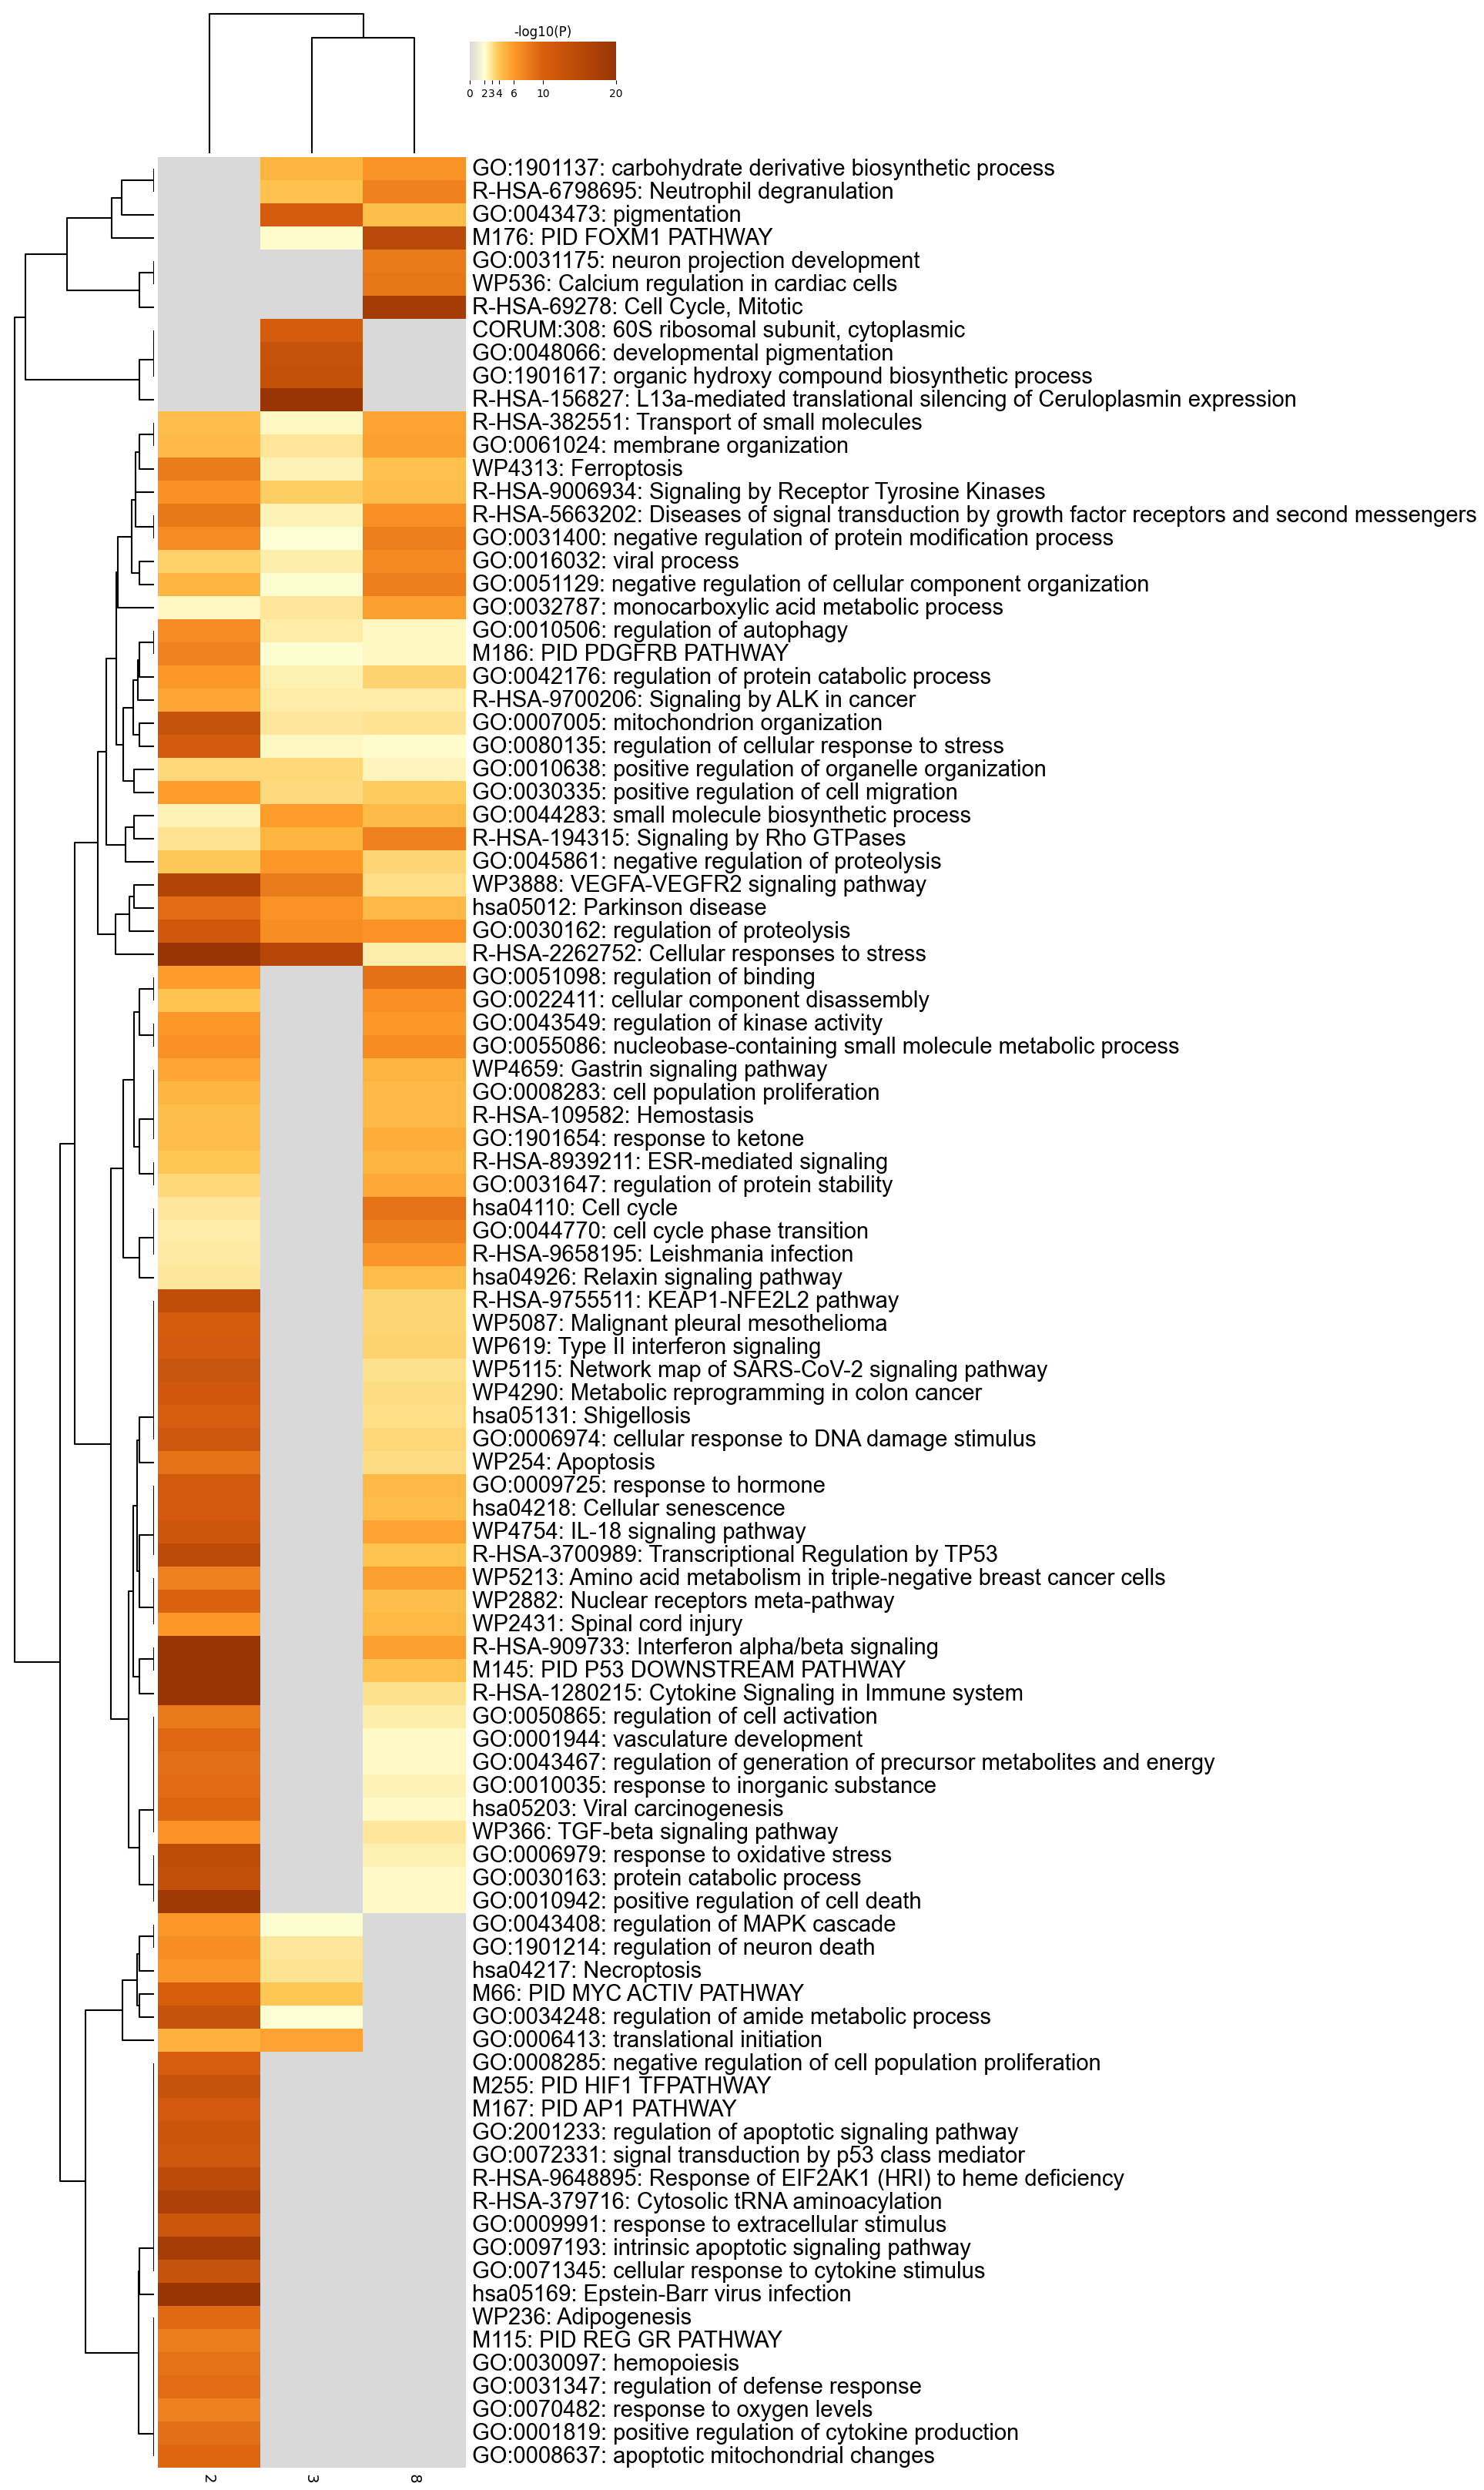
</div>

# Early sensitive vs late resistant

In [12]:
ad_sel = ad_all[(ad_all.obs['T'].isin(['T1', 'T4'])) & (ad_all.obs['cluster'].isin(['2'])), :]
identity = 'T'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='E_vs_L_resistant', minPct=0.10, downsample=300, logfc_threshold=0.20)

T1    1218
T4     422
Name: T, dtype: int64
(600, 11243) {'T1': 300, 'T4': 300}
adata shape: (600, 11243)
(945, 6)
{'T1': 378, 'T4': 567} 945


<div>
    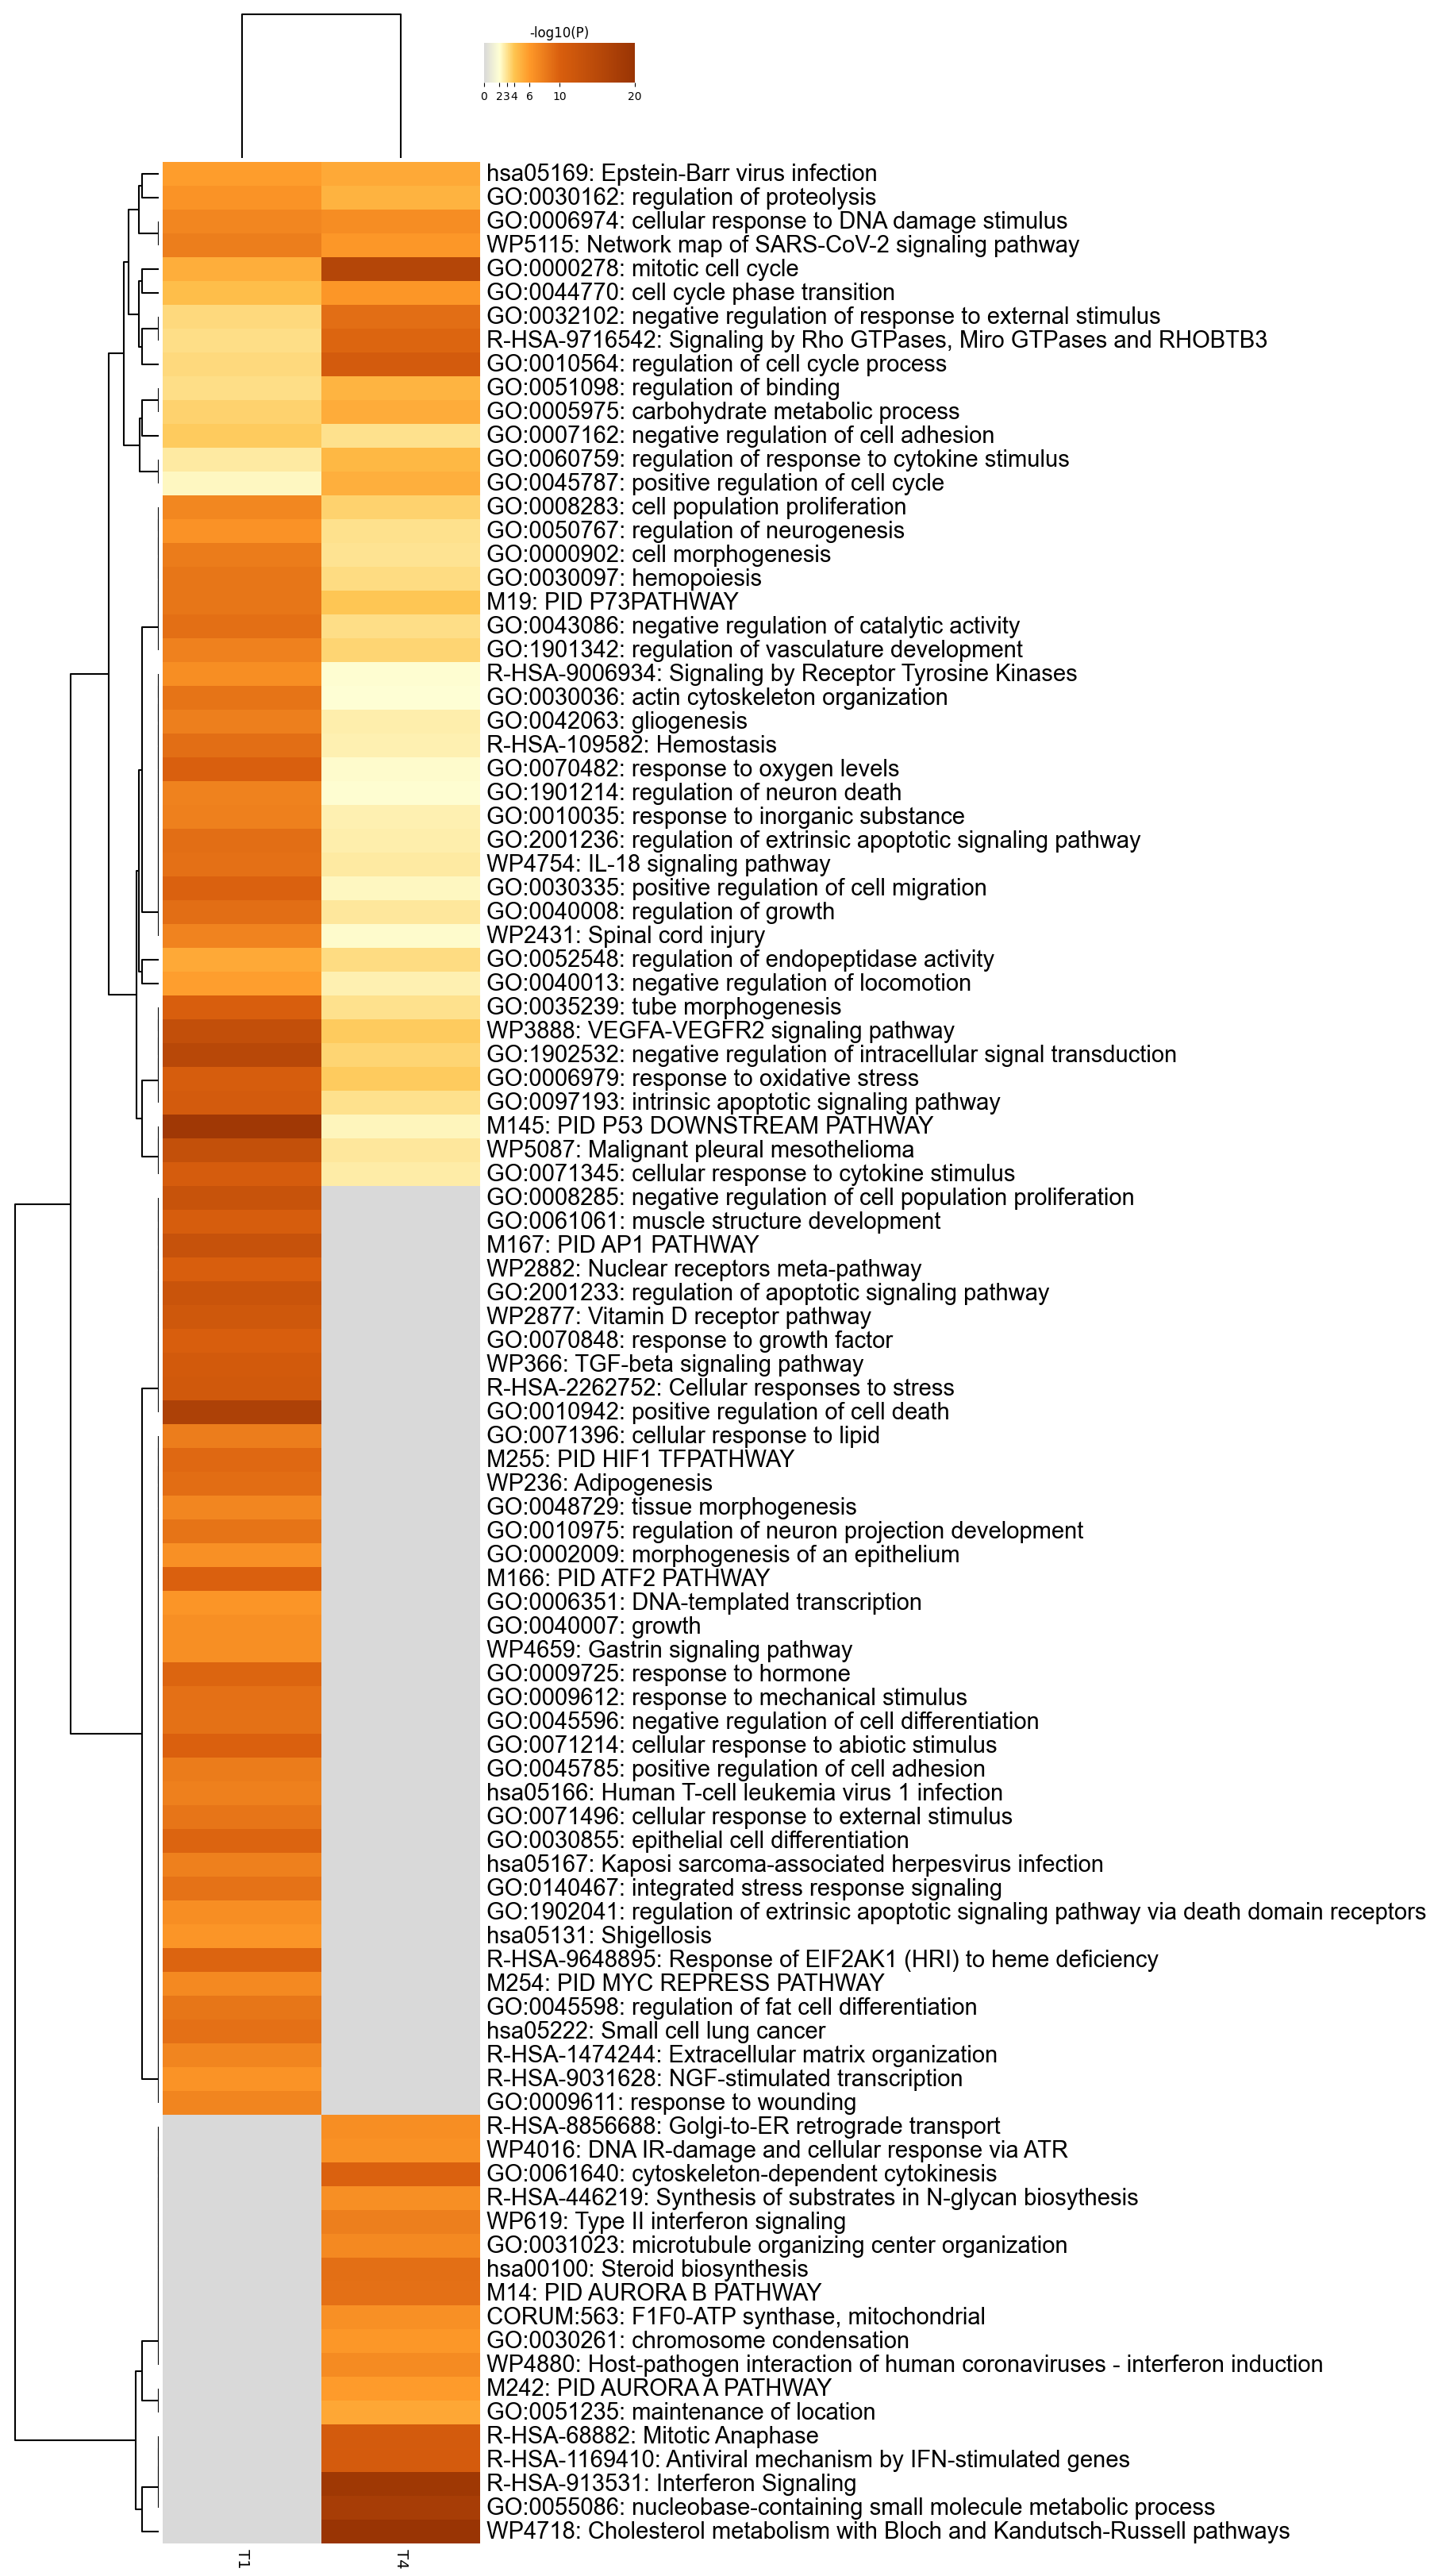
</div>

# Early vs late persisters

In [13]:
ad_sel = ad_all[(ad_all.obs['T'].isin(['T1', 'T4'])) & (ad_all.obs['cluster'].isin(['3'])), :]
identity = 'T'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='E_vs_L_persisters', minPct=0.10, downsample=300, logfc_threshold=0.20)

T1    403
T4    740
Name: T, dtype: int64
(600, 11062) {'T1': 300, 'T4': 300}
adata shape: (600, 11062)
(548, 6)
{'T1': 177, 'T4': 370} 547


<div>
    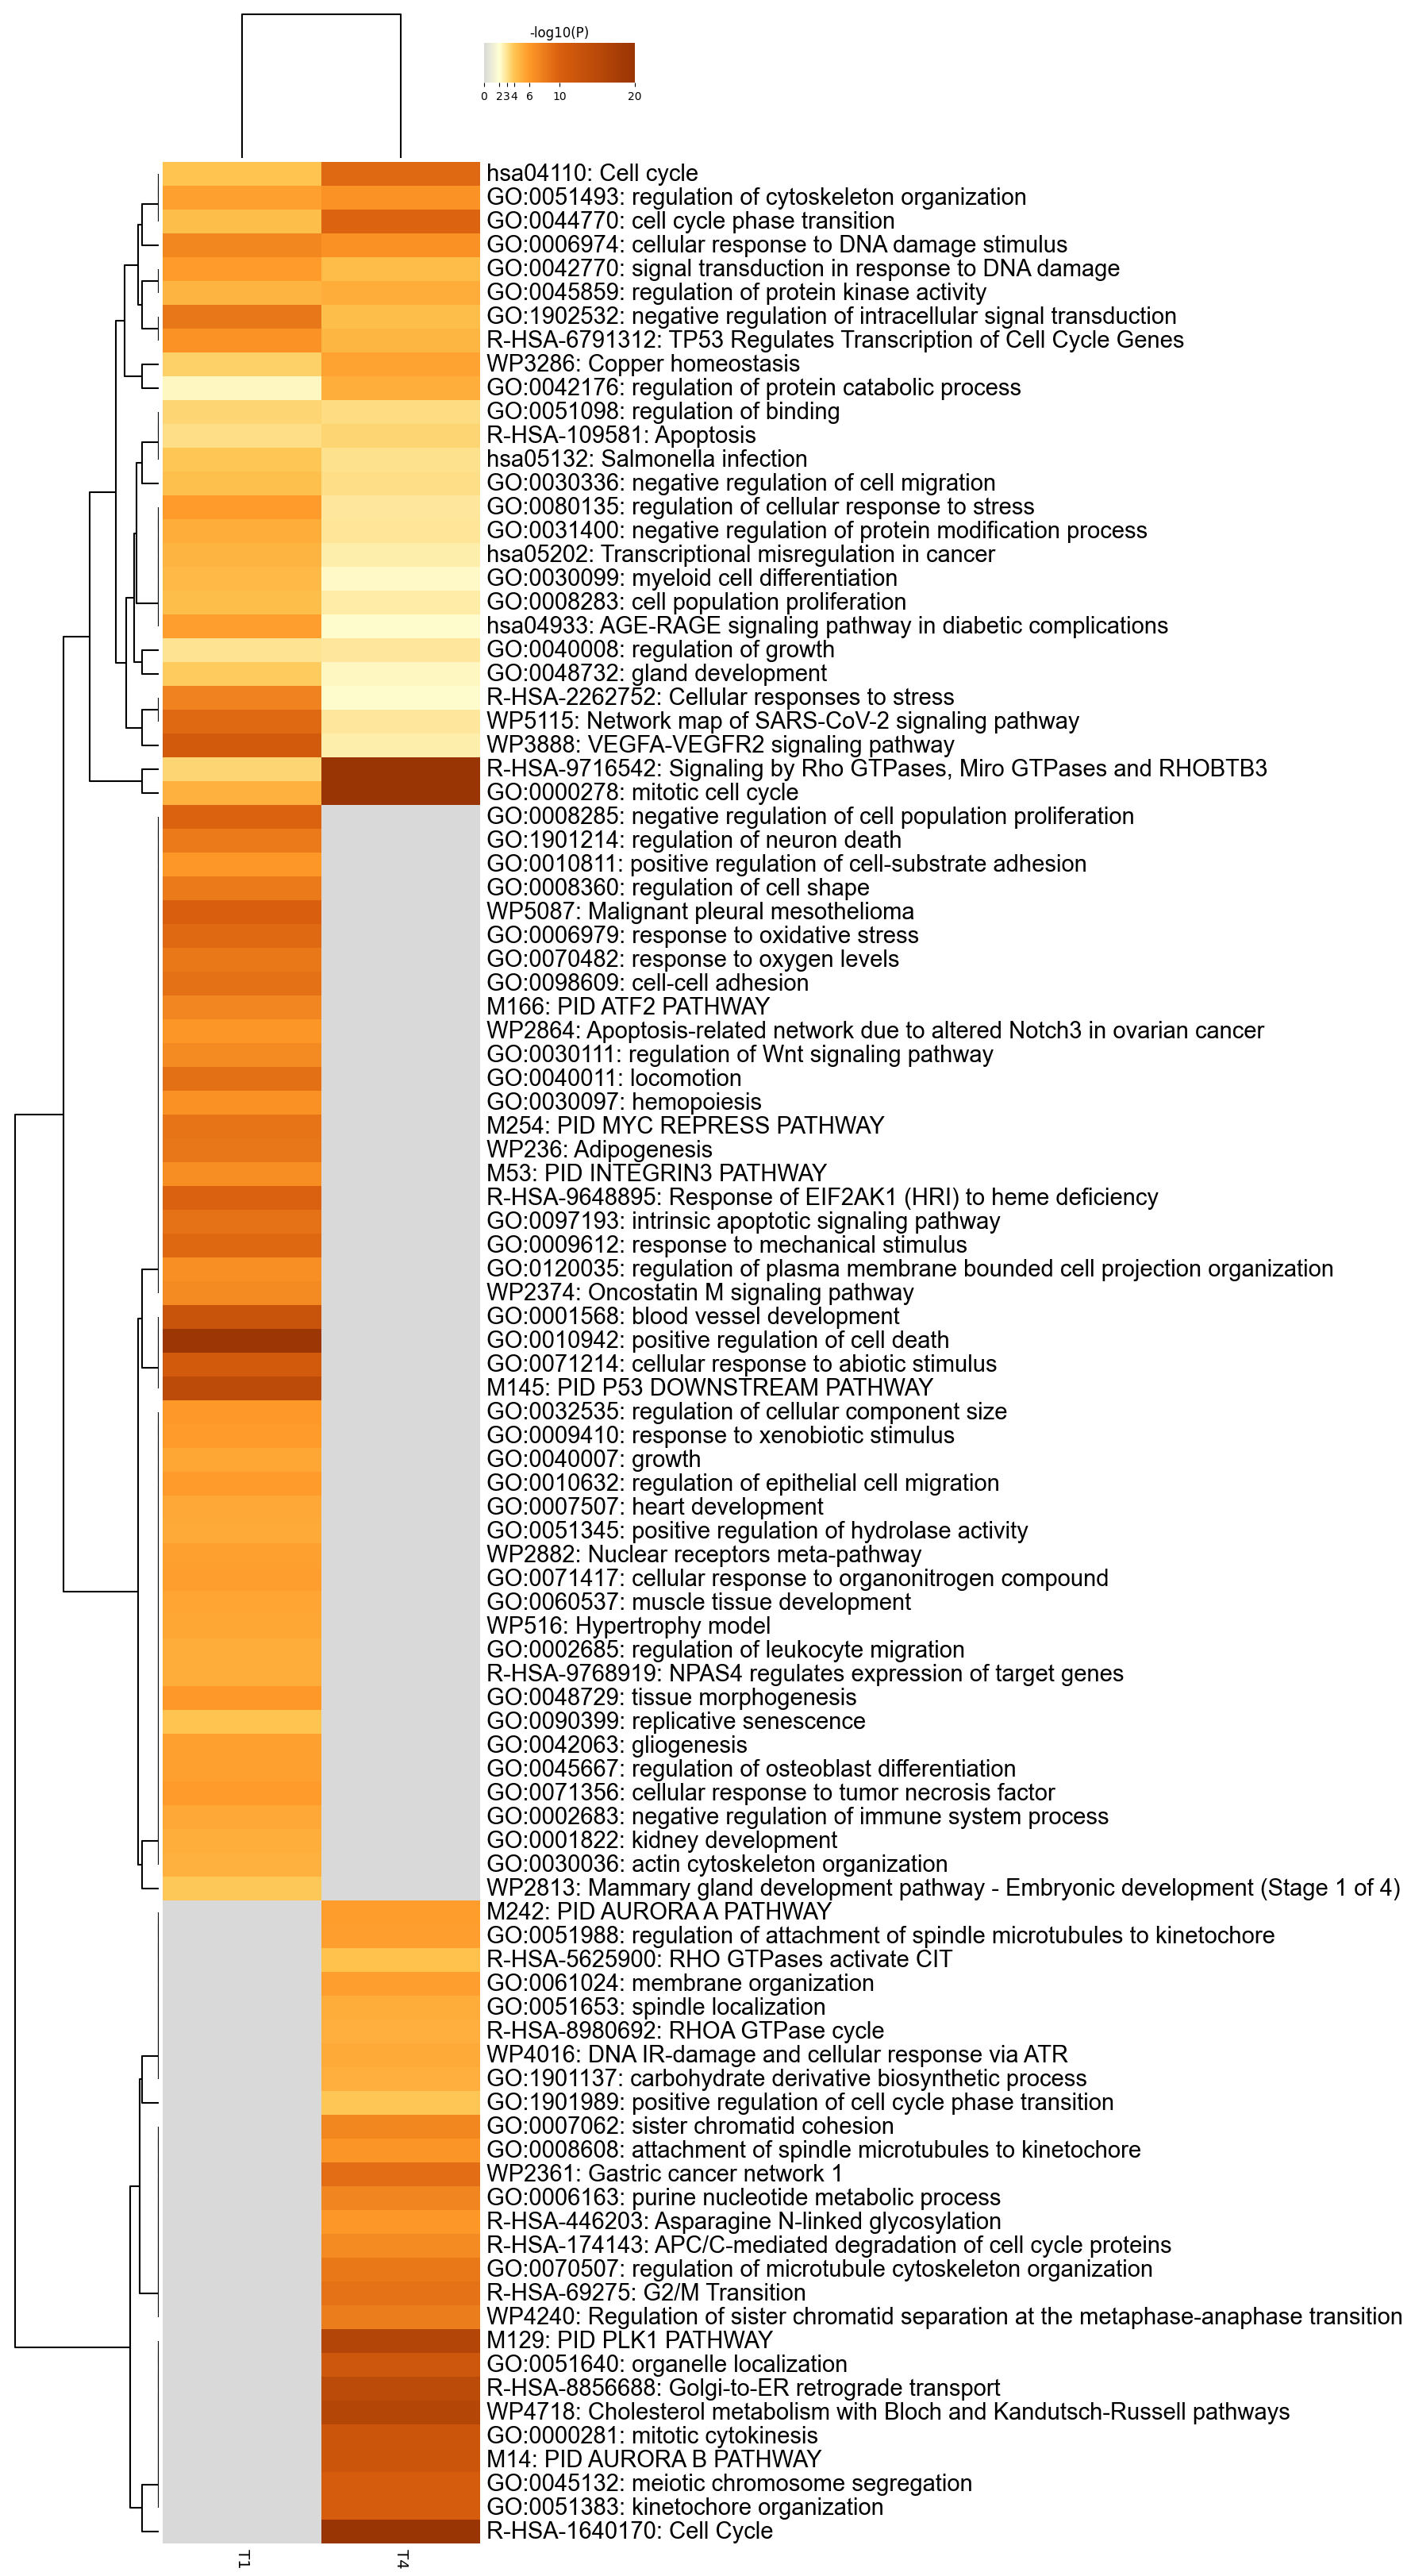
</div>